# Import packages and data

In [56]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [57]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys, folium
%matplotlib inline 

import os,sys

import warnings
warnings.filterwarnings('ignore')

HH_MTF_Rwanda=pd.read_csv('HH_MTF_Rwanda.csv')
codebook_rwanda=pd.read_csv('codebook_rwanda.csv')

In [58]:
HH_MTF_Rwanda.columns

Index(['Unnamed: 0', 'E_capacity', 'E_availability_day',
       'E_availability_evening', 'E_reliability', 'E_quality', 'E_legality',
       'E_health'],
      dtype='object')

In [59]:
HH_MTF_Rwanda = HH_MTF_Rwanda.drop('Unnamed: 0', 1)

In [60]:
HH_MTF_Rwanda.columns

Index(['E_capacity', 'E_availability_day', 'E_availability_evening',
       'E_reliability', 'E_quality', 'E_legality', 'E_health'],
      dtype='object')

In [61]:
HH_MTF_Rwanda['E_Index'] = HH_MTF_Rwanda.min(axis=1)

In [62]:
#xl = pd.ExcelFile("codebook_rwanda.xlsx")
#xl.sheet_names

In [63]:
#codebook_rwanda = xl.parse("Sheet1")

In [64]:
#codebook_rwanda.to_csv('codebook_rwanda.csv')

In [65]:
codebook_rwanda.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Household Identification', 'Cluster',
       'strata', 'Province', 'District', 'Sector', 'Cellule', 'Village',
       ...
       'T28_Solar home system', 'T28b_Size',
       'T28c_What are the solar devices used for', 'DATE_START', 'TIME_START',
       'DATE_END', 'TIME_END', 'Cluster.1',
       'Basic sample weight calculation and calibration process', 'Locality'],
      dtype='object', length=732)

In [66]:
# the first column of codebook_rwanda is a running number and has no numerical significance 
codebook_rwanda = codebook_rwanda.drop('Unnamed: 0', 1)

In [67]:
# the column 'Respondent id' of codebook_rwanda is probably the id number of the interviewer and has no numerical significance related to the household
codebook_rwanda = codebook_rwanda.drop('Respondent id', 1)

In [68]:
import qgrid

col_options = {
    'width': 140,
}
col_defs = {
    'index': {
        'width': 40,
    }
}
qgrid.show_grid(HH_MTF_Rwanda,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [13]:
import qgrid

col_options = {
    'width': 140,
}
col_defs = {
    'index': {
        'width': 40,
    }
}
qgrid.show_grid(codebook_rwanda,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Removing the columns missing names

In [14]:
codebook_rwanda.columns.get_loc(" ")

628

In [15]:
codebook_rwanda = codebook_rwanda.drop(' ', 1)

## Replacing blank values (white space) with NaN

In [16]:
# codebook_rwanda = codebook_rwanda.apply(lambda x: x.str.strip()).replace('', np.nan)
# codebook_rwanda = codebook_rwanda.applymap(lambda x: np.nan if isinstance(x, basestring) and x.isspace() else x)
codebook_rwanda = codebook_rwanda.replace(r'^\s*$', np.nan, regex=True)
codebook_rwanda

,Unnamed: 0.1,Household Identification,Cluster,strata,Province,District,Sector,Cellule,Village,B2_household living in this dwelling for the entire year,...,T28_Solar home system,T28b_Size,T28c_What are the solar devices used for,DATE_START,TIME_START,DATE_END,TIME_END,Cluster.1,Basic sample weight calculation and calibration process,Locality
0,1,1102020811001,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,NaN,NaN,NaN,2016-11-18,12:05:00,2016-11-18,12:49:00,11,476617645263672,0
1,2,1102020811002,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,NaN,NaN,NaN,2016-11-18,10:23:00,2016-11-18,11:26:00,12,370042022705078,0
2,3,1102020811003,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,NaN,NaN,NaN,2016-11-18,11:32:00,2016-11-18,12:24:00,12,370042022705078,0
3,4,1102020811004,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,NaN,NaN,NaN,2016-11-18,10:30:00,2016-11-18,11:17:00,12,370042022705078,0
4,5,1102020811005,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,2.0,NaN,NaN,2016-11-18,10:14:00,2016-11-18,11:28:00,12,370042022705078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,3291,5714040157078,275,2752,Eastern,Bugesera,Rweru,Nemba,Kigina,2,...,NaN,NaN,NaN,2016-11-14,16:49:00,2016-11-14,13:13:00,2752,978847265625,0
3291,3292,5714040157079,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,...,NaN,NaN,NaN,2016-11-14,13:59:00,2016-11-14,15:50:00,2751,729744079589844,0
3292,3293,5714040157082,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,...,NaN,NaN,NaN,2016-11-14,16:10:00,2016-11-14,17:44:00,2751,729744079589844,0
3293,3294,5714040157083,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,...,NaN,NaN,NaN,2016-11-14,13:26:00,2016-11-14,15:39:00,2751,729744079589844,0


In [17]:
# to verify that no cells are empty
np.where(codebook_rwanda.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

## Replacing NaN with "Missing_data"

In [18]:
codebook_rwanda = codebook_rwanda.replace(np.nan, 'Missing_data', regex=True)
codebook_rwanda

,Unnamed: 0.1,Household Identification,Cluster,strata,Province,District,Sector,Cellule,Village,B2_household living in this dwelling for the entire year,...,T28_Solar home system,T28b_Size,T28c_What are the solar devices used for,DATE_START,TIME_START,DATE_END,TIME_END,Cluster.1,Basic sample weight calculation and calibration process,Locality
0,1,1102020811001,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,Missing_data,Missing_data,Missing_data,2016-11-18,12:05:00,2016-11-18,12:49:00,11,476617645263672,0
1,2,1102020811002,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,Missing_data,Missing_data,Missing_data,2016-11-18,10:23:00,2016-11-18,11:26:00,12,370042022705078,0
2,3,1102020811003,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,Missing_data,Missing_data,Missing_data,2016-11-18,11:32:00,2016-11-18,12:24:00,12,370042022705078,0
3,4,1102020811004,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,Missing_data,Missing_data,Missing_data,2016-11-18,10:30:00,2016-11-18,11:17:00,12,370042022705078,0
4,5,1102020811005,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,...,2,Missing_data,Missing_data,2016-11-18,10:14:00,2016-11-18,11:28:00,12,370042022705078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,3291,5714040157078,275,2752,Eastern,Bugesera,Rweru,Nemba,Kigina,2,...,Missing_data,Missing_data,Missing_data,2016-11-14,16:49:00,2016-11-14,13:13:00,2752,978847265625,0
3291,3292,5714040157079,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,...,Missing_data,Missing_data,Missing_data,2016-11-14,13:59:00,2016-11-14,15:50:00,2751,729744079589844,0
3292,3293,5714040157082,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,...,Missing_data,Missing_data,Missing_data,2016-11-14,16:10:00,2016-11-14,17:44:00,2751,729744079589844,0
3293,3294,5714040157083,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,...,Missing_data,Missing_data,Missing_data,2016-11-14,13:26:00,2016-11-14,15:39:00,2751,729744079589844,0


In [19]:
# currently columns are of the type int64
codebook_rwanda['B2_household living in this dwelling for the entire year'].dtypes

dtype('int64')

In [20]:
# converting the entire DataFrame to type "string"
codebook_rwanda = codebook_rwanda.astype(str)

In [21]:
# checking a column to verify if its type is "string"
codebook_rwanda['strata'].dtypes

dtype('O')

## Removing columns without significance
To selec the columns to be passed through one-hot-encoding, no variables should be included that contribute information about the household.
Columns without signifincance are removed.

In [22]:
codebook_rwanda_OHE = codebook_rwanda.drop(['Unnamed: 0.1','Household Identification', 'DATE_START', 'TIME_START', 'DATE_END', 'TIME_END', 'Basic sample weight calculation and calibration process'], 1)

In [23]:
codebook_rwanda_OHE.describe().to_csv('describe.csv')

In [24]:
codebook_rwanda_OHE

,Cluster,strata,Province,District,Sector,Cellule,Village,B2_household living in this dwelling for the entire year,B3_Is this your main dwelling,B4_years you have been living in this community,...,T26b_Size,T26c_What are the solar devices used for,T27_Solar lighting system,T27b_Size,T27c_What are the solar devices used for,T28_Solar home system,T28b_Size,T28c_What are the solar devices used for,Cluster.1,Locality
0,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,Missing_data,20,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,11,0
1,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,Missing_data,5,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,12,0
2,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,Missing_data,1,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,12,0
3,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,Missing_data,20,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,12,0
4,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1,Missing_data,34,...,Missing_data,Missing_data,2.0,Missing_data,Missing_data,2.0,Missing_data,Missing_data,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,275,2752,Eastern,Bugesera,Rweru,Nemba,Kigina,2,1.0,6,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,2752,0
3291,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,Missing_data,4,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,2751,0
3292,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,Missing_data,20,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,2751,0
3293,275,2751,Eastern,Bugesera,Rweru,Nemba,Kigina,1,Missing_data,5,...,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,2751,0


# Feature engineering

## Dividing the categorical data into dummy variables

In [25]:
X = pd.get_dummies(codebook_rwanda_OHE)

In [26]:
X

,Cluster_1,Cluster_10,Cluster_100,Cluster_101,Cluster_102,Cluster_103,Cluster_104,Cluster_105,Cluster_106,Cluster_107,...,Cluster.1_951,Cluster.1_952,Cluster.1_962,Cluster.1_972,Cluster.1_981,Cluster.1_982,Cluster.1_991,Cluster.1_992,Locality_0,Locality_1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Model Training and Parameter Tuning
## Determine number of clusters with Elbow method
https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms


from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


# Annotate arrow

ax.annotate('Possible Elbow Point', xy=(2, 3e8), xytext=(3, 6e8),           
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
ax.annotate('Possible Elbow Point', xy=(3, 0.9e8), xytext=(4, 4e8),           
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible Elbow Point', xy=(5, 0.35e8), xytext=(5.5, 2e8),           
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2))
plt.savefig('Searching for elbows.jpg',dpi=300)
plt.show()


Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

## Generate the clusters

In [31]:
cluster_number = 3 # select the number of clusters based on the Elbow Method "plot above"

#a = X['income']

#b = X['size']

#P = [list(item) for item in zip(a,b)]

kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(X)

labels = kmeans.labels_ 

X['label'] = labels

X['cluster'] = 'E'
X.loc[X['label'] == 0, 'cluster'] = 'A'
X.loc[X['label'] == 1, 'cluster'] = 'B'
X.loc[X['label'] == 2, 'cluster'] = 'C'
X.loc[X['label'] == 3, 'cluster'] = 'D'

X['label'].unique()

array([2, 1, 0])

In [32]:
X['cluster'].unique()

array(['C', 'B', 'A'], dtype=object)

# Model Evaluation
## Create Custom Palette for the Labels

customPalette


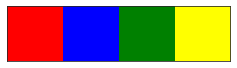

In [33]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette https://www.webucator.com/blog/2015/03/python-color-constants-module/
print('customPalette')
customPalette = ['#FF0000', '#0000FF', '#008000', '#FFFF00']
sns.set_palette(customPalette)
sns.palplot(customPalette)


esmap_colors


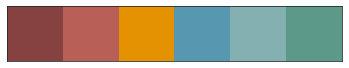

In [34]:
print('esmap_colors')
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)
sns.palplot(esmap_colors)

## Create labeled groups of data
Next, we need to generate some data to plot. I defined four groups (A, B, C, and D) and specified their center points. For each label, I sampled nx2 data points from a gaussian distribution centered at the mean of the group and with a standard deviation of 0.5.

To make these plots, each datapoint needs to be assigned a label. If your data isn't labeled, you can use a clustering algorithm to create artificial groups.

In [35]:
X['cluster'] = 'A'
X.loc[X['label'] == 1, 'cluster'] = 'B'
X.loc[X['label'] == 2, 'cluster'] = 'C'
X.loc[X['label'] == 3, 'cluster'] = 'D'
X.loc[X['label'] == 4, 'cluster'] = 'E'
X.head(10)

,Cluster_1,Cluster_10,Cluster_100,Cluster_101,Cluster_102,Cluster_103,Cluster_104,Cluster_105,Cluster_106,Cluster_107,...,Cluster.1_962,Cluster.1_972,Cluster.1_981,Cluster.1_982,Cluster.1_991,Cluster.1_992,Locality_0,Locality_1,label,cluster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,C
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,C
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,C
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,B


## Implementing a standard label
https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python <br>


fig, axes = plt.subplots(figsize=(10, 5))
#axes.set_ylim(0,max(X['size'])+1)
#axes.set_xlim(-1,max(X['E_Index'])+1)
sns.scatterplot(X['C_Index'], X['size'], hue=sorted(X['cluster']), 
                palette=customPalette[0:3])
plt.legend(loc='lower left')
plt.title('KMeans with 3 Clusters - C_Index vs size')

plt.savefig('KMeans with 3 Clusters - C_Index vs size.jpg',dpi=300)
plt.show()

## Test Markers with labels centered on the cluster means


qgrid.show_grid(X,column_options=col_options,
                               column_definitions=col_defs,
                               grid_options={'forceFitColumns': False})

X[X['cluster']=='C'].to_csv("Households clustered C.csv")
X[X['C_Index']==3].to_csv("Households C_Index 3.csv")
X.to_csv("All variables.csv")

scaled_X.head()

## Ploting the radius for each cluster
### Determine the kmean radii
https://datascience.stackexchange.com/questions/32753/find-cluster-diameter-and-associated-cluster-points-with-kmeans-clustering-scik

#iris example from https://datascience.stackexchange.com/questions/32753/find-cluster-diameter-and-associated-cluster-points-with-kmeans-clustering-scik

x = scaled_X
estimator = kmeans
y_kmeans = labels

#To get the clusters' radii you can use the following code snippet:

#empty dictionaries

clusters_centroids=dict()
clusters_radii= dict()

'''looping over clusters and calculate Euclidian distance of 
each point within that cluster from its centroid and 
pick the maximum which is the radius of that cluster'''

for cluster in list(set(y_kmeans)):

    clusters_centroids[cluster]=list(zip(estimator.cluster_centers_[:, 0],
                                         estimator.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster]))
                                   for i in zip(x.loc[y_kmeans == cluster, 'income'],
                                                x.loc[y_kmeans == cluster, 'size'])])

#Visualising the clusters and cluster circles
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x.loc[y_kmeans == 0, 'income'], x.loc[y_kmeans == 0, 'size'], s = 100, c = customPalette[0], label = 'A')
art = patches.Circle(clusters_centroids[0],clusters_radii[0], edgecolor='r',fill=False)
ax.add_patch(art)

plt.scatter(x.loc[y_kmeans == 1, 'income'], x.loc[y_kmeans == 1, 'size'], s = 100, c = customPalette[1], label = 'B')
art = patches.Circle(clusters_centroids[1],clusters_radii[1], edgecolor='b',fill=False)
ax.add_patch(art)

plt.scatter(x.loc[y_kmeans == 2, 'income'], x.loc[y_kmeans == 2, 'size'], s = 100, c = customPalette[2], label = 'C')
art = patches.Circle(clusters_centroids[2],clusters_radii[2], edgecolor='g',fill=False)
ax.add_patch(art)

#Plotting the centroids of the clusters
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:,1], s = 100, c = customPalette[3], label = 'Centroids')

ax.set_title('Scatter plot with colored clustering labels and radii')
ax.set_xlabel('Income - Congolean Francs per month')
ax.set_ylabel('Household size')
plt.legend()
plt.tight_layout()
plt.savefig('kmeans_3_clusters.jpg',dpi=300)

import matplotlib.patches as patches

#create a new figure and set the x and y limits
fig, ax = plt.subplots(figsize=(12,8))

# set the axes limit according to dataframe values
ax.set_ylim(-1,max(X['size'])+1)
ax.set_xlim(-1000,max(X['income'])+1000)

# list of all cluster labels
clusters = sorted(X['cluster'].unique())      

for i in range(0,len(clusters)):
    cluster = clusters[i]
    X_cluster = X.loc[X['cluster']==cluster,:]
    for l, row in X_cluster.iterrows():
        
        #add the data point as text
        ax.annotate(s=row['C_Index'], 
                     xy=(row['income'],row['size']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=16,
                     color=customPalette[i]) 

        #add label placed at the centroid
        plt.annotate(cluster, 
                  X.loc[X['cluster']==cluster,['income','size']].mean(),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=16, weight='bold',
                  color=customPalette[i])

ax.set_title('Scatter plot with colored clustering labels and MTF C_Index')
ax.set_xlabel('Income - Congolean Francs per month')
ax.set_ylabel('Household size')
 
plt.savefig('kmeans-numbered_3_clusters.jpg',dpi=300)
plt.show()

## PCA Projection to 2D
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [69]:
X['E_Index'] = HH_MTF_Rwanda['E_Index']

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = X.drop(['label','cluster'], axis=1)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_pca = pd.concat([principalDf, X[['cluster']]], axis = 1)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  3295 non-null   float64
 1   principal component 2  3295 non-null   float64
 2   cluster                3295 non-null   object 
dtypes: float64(2), object(1)
memory usage: 77.4+ KB


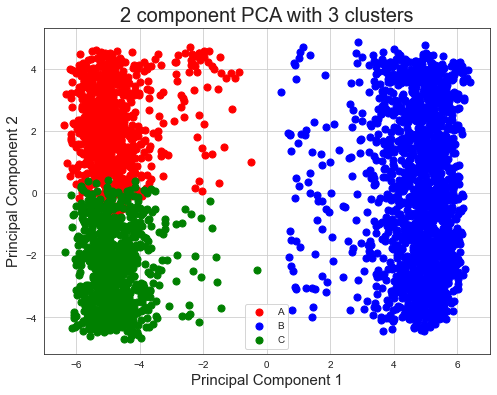

In [71]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with 3 clusters', fontsize = 20)
targets = ['A', 'B', 'C']
colors = [customPalette[0], customPalette[1], customPalette[2]]
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['cluster'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('2D-PCA_3_clusters.jpg',dpi=300)

## Numbered points on the PCA projection

In [72]:
# Create a DataFrame which includes df_pca and the variable C_Index
df_pca_C = df_pca
df_pca_C['E_Index'] = X['E_Index'].to_numpy()

In [ ]:
#create a new figure and set the x and y limits
fig, ax = plt.subplots(figsize=(12,8))

# set the axes limit according to dataframe values
ax.set_ylim(-3,max(df_pca_C['principal component 2'])+1)
ax.set_xlim(-4,max(df_pca_C['principal component 1'])+1)

# list of all cluster labels
clusters = df_pca_C['cluster'].unique()       

for i in range(0,len(clusters)):
    cluster = clusters[i]
    df_pca_cluster = df_pca_C.loc[df_pca_C['cluster']==cluster,:]
    for l, row in df_pca_cluster.iterrows():
        
        #add the data point as text
        ax.annotate(s=row['E_Index'], 
                     xy=(row['principal component 1'],row['principal component 2']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=16,
                     color=customPalette[i]) 

        #add label placed at the centroid
        plt.annotate(cluster, 
                  df_pca_C.loc[df_pca_C['cluster']==cluster,['principal component 1','principal component 2']].mean(),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=16, weight='bold',
                  color=customPalette[i])

ax.set_title('2 component PCA showing E_Index on each point')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
 
plt.savefig('2D-PCA-numbered-3_clusters.jpg',dpi=300)
plt.show()